<a href="https://colab.research.google.com/github/AndreVerasFernandes/Data-Structures/blob/main/ADO_Pilhas_Andr%C3%A9_Luiz_Veras_Fernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Stack:
  def __init__(self):
    self.stack = []
  def push(self, element):
    self.stack.append(element)
  def pop(self):
    if self.isEmpty():
      return "Stack is empty"
    return self.stack.pop()
  def peek(self):
    if self.isEmpty():
      return "Stack is empty"
    return self.stack[-1]
  def isEmpty(self):
    return len(self.stack) == 0
  def size(self):
    return len(self.stack)


myStack = Stack()
myStack.push('A')
myStack.push('B')
myStack.push('C')
print("Stack: ", myStack.stack)
print("Pop: ", myStack.pop())
print("Peek: ", myStack.peek())
print("isEmpty: ", myStack.isEmpty())
print("Size: ", myStack.size())
print("Pop: ", myStack.pop())
print("Size: ", myStack.size())
print("Pop: ", myStack.pop())
print("Size: ", myStack.size())
print("Peek: ", myStack.peek())


Stack:  ['A', 'B', 'C']
Pop:  C
Peek:  B
isEmpty:  False
Size:  2
Pop:  B
Size:  1
Pop:  A
Size:  0
Peek:  Stack is empty


Considere um labirinto representado por uma matriz, onde cada célula pode
ser um caminho livre (0) ou uma parede (1). O objetivo é encontrar um
caminho do ponto inicial até o ponto final.

---

**EXERCÍCIO 1: Construa um labirinto por meio de um array bidimensional
(10x10) e preencha com valores 0 ou 1 de forma aleatória. Em seguida, utilize
uma pilha para encontrar um caminho entre a parte superior e a inferior do
labirinto. A pilha deve guardar os índices dos elementos do array e mostrar a
trajetória num gráfico de dispersão xy!**

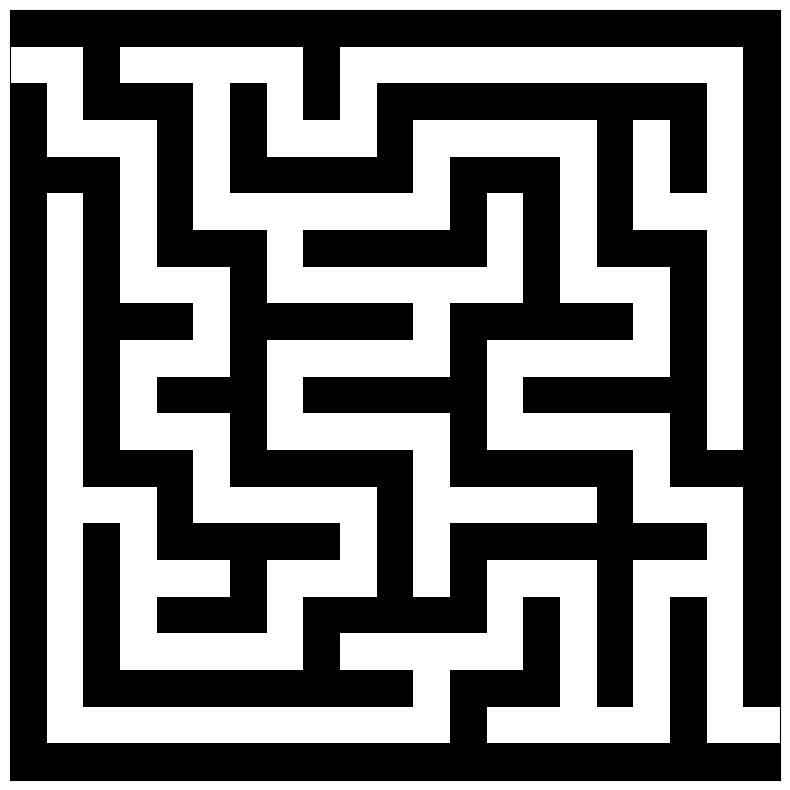

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Stack:
    def __init__(self):
        self.stack = []

    def push(self, element):
        self.stack.append(element)

    def pop(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack.pop()

    def peek(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack[-1]

    def isEmpty(self):
        return len(self.stack) == 0

    def size(self):
        return len(self.stack)

def create_maze(dim):
    maze = np.ones((dim*2+1, dim*2+1))

    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    stack = Stack()
    stack.push((x, y))
    while not stack.isEmpty():
        x, y = stack.peek()

        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.push((nx, ny))
                break
        else:
            stack.pop()


    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

def find_path(maze):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    stack = Stack()
    stack.push((start, []))
    while not stack.isEmpty():
        (node, path) = stack.pop()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if next_node == end:
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                stack.push((next_node, path + [next_node]))

def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10, 10))


    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')


    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]


    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

if __name__ == "__main__":
    dim = 10  # Dimensão fixa do labirinto
    maze = create_maze(dim)
    path = find_path(maze)
    draw_maze(maze, path)


Expressões postfixas e infixas são duas formas diferentes de representar expressões matemáticas. A notação infixa é a forma tradicional que
estamos acostumados a ver, onde os operadores estão entre os operandos. Já a notação postfixa (ou notação polonesa reversa) coloca os
operadores após os operandos. Vamos explorar cada uma delas:

Notação Infixa:
Na notação infixa, os operadores são colocados entre os operandos.
Exemplo: 3+4×2

Notação Postfixa (ou Polonesa Reversa):
Na notação postfixa, os operadores são colocados após os operandos.
Exemplo: 342×+

A principal vantagem da notação postfixa é que não requer o uso de parênteses para indicar a ordem das operações, pois a ordem é
determinada pela posição dos operadores. Isso simplifica a avaliação de expressões e elimina ambiguidades. Além disso, a avaliação de
expressões postfixas pode ser feita de maneira eficiente usando uma pilha.

A conversão entre notações infixa e postfixa geralmente envolve a reorganização dos operadores e operandos de acordo com as regras da
álgebra.

---

EXERCÍCIO 2: explique como uma pilha pode ser aplicada para que um usuário entre com uma expressão matemática como “3+4x2” e seu
algoritmo a transforme em postfixa e retorne o resultado correta da operação matemática.

**Resposta:**

Podemos usar uma pilha para reorganizar os operadores e operandos.
Percorremos a expressão da esquerda para a direita:
Se encontrarmos um operando (número), adicionamos diretamente à saída.
Se encontrarmos um operador (como + ou ×), verificamos a precedência:
Se a pilha estiver vazia ou o operador atual tiver maior precedência do que o operador no topo da pilha, empilhamos o operador atual.
Caso contrário, desempilhamos os operadores da pilha até encontrar um operador com menor precedência ou até a pilha ficar vazia, e então empilhamos o operador atual.
No final, desempilhamos todos os operadores restantes da pilha e adicionamos à saída

Agora que temos a expressão na notação postfixa, podemos avaliá-la usando uma pilha.
Percorremos a expressão da esquerda para a direita:
Se encontrarmos um operando, empilhamos na pilha.
Se encontrarmos um operador, desempilhamos os dois operandos superiores da pilha, aplicamos o operador e empilhamos o resultado de volta na pilha.
No final, o resultado estará no topo da pilha.


In [ ]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, element):
        self.stack.append(element)

    def pop(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack.pop()

    def peek(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack[-1]

    def isEmpty(self):
        return len(self.stack) == 0

    def size(self):
        return len(self.stack)

def infix_to_postfix(expression):
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2}
    result = []
    stack = Stack()

    for char in expression:
        if char.isdigit():
            result.append(char)
        elif char in "+-*/":
            while not stack.isEmpty() and precedence.get(char, 0) <= precedence.get(stack.peek(), 0):
                result.append(stack.pop())
            stack.push(char)
        elif char == '(':
            stack.push(char)
        elif char == ')':
            while not stack.isEmpty() and stack.peek() != '(':
                result.append(stack.pop())
            stack.pop()  # Remove '('

    while not stack.isEmpty():
        result.append(stack.pop())

    return ''.join(result)

def postfix(expression):
    stack = Stack()

    for char in expression:
        if char.isdigit():
            stack.push(int(char))
        elif char in "+-*/":
            operand2 = stack.pop()
            operand1 = stack.pop()
            if char == '+':
                stack.push(operand1 + operand2)
            elif char == '-':
                stack.push(operand1 - operand2)
            elif char == '*':
                stack.push(operand1 * operand2)
            elif char == '/':
                stack.push(operand1 / operand2)

    return stack.pop()

infix_expressao = "3+4*2"
postfix_expressao = infix_to_postfix(infix_expressao)
result = postfix(postfix_expressao)
print(f"Expressão postfixa: {postfix_expressao}")
print(f"Resultado: {result}")


Expressão postfixa: 342*+
Resultado: 11


EXERCÍCIO 3: implemente o algoritmo do EXERCÍCIO 2, em python, tal que o usuário possa entrar com qualquer expressão matemática e
sempre retorne o resultado correto.
Obs. As expressões poderão ser trigonomérticas também. Exemplo “3xsen(20)+12”. Neste caso a multiplicação deve ocorrer sempre que
parecer “x”, ou “X”, ou “*”!

In [ ]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, element):
        self.stack.append(element)

    def pop(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack.pop()

    def peek(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack[-1]

    def isEmpty(self):
        return len(self.stack) == 0

def infix_postfix(expression):
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2, '^': 3}
    result = []
    stack = Stack()

    for char in expression:
        if char.isalnum():
            result.append(char)
        elif char in "+-*/^":
            while not stack.isEmpty() and precedence.get(char, 0) <= precedence.get(stack.peek(), 0):
                result.append(stack.pop())
            stack.push(char)
        elif char == '(':
            stack.push(char)
        elif char == ')':
            while not stack.isEmpty() and stack.peek() != '(':
                result.append(stack.pop())
            stack.pop()  # Remove '('

    while not stack.isEmpty():
        result.append(stack.pop())

    return ''.join(result)

def postfix(expression):
    stack = Stack()

    for char in expression:
        if char.isalnum():
            stack.push(char)
        elif char in "+-*/^":
            operand2 = stack.pop()
            operand1 = stack.pop()
            if char == '+':
                stack.push(str(float(operand1) + float(operand2)))
            elif char == '-':
                stack.push(str(float(operand1) - float(operand2)))
            elif char == '*':
                stack.push(str(float(operand1) * float(operand2)))
            elif char == '/':
                stack.push(str(float(operand1) / float(operand2)))
            elif char == '^':
                stack.push(str(float(operand1) ** float(operand2)))

    return stack.pop()

expressao = input("Digite a expressão matemática: ")
postfix_expressao = infix_postfix(expressao)
result = postfix(postfix_expressao)
print(f"Expressão postfixa: {postfix_expressao}")
print(f"Resultado: {result}")


Digite a expressão matemática: 2^3+cos(45)
Expressão postfixa: 23^cos45+
Resultado: 9.0


EXERCÍCIO 4:
a) Explique como funciona a Python Virtual Machine (PVM).

b) Podemos afirmar que os processos são modelados por uma pilha?

c) Implemente o código que simula o funcionamento da PVM.


**Resposta**

a) O PVM é um programa que providencia um ambiente virtual capaz de executar o programa. A função do PVM é converter as instruções do código de bytes em código de máquina para que o computador possa executar essas instruções de código de máquina e exibir a saída.

A PVM possui um ciclo de vida básico, que consiste em três fases principais:

Compilação: O código-fonte Python é compilado em bytecode Python por meio de um compilador Python, como o CPython. O bytecode Python é um código de máquina de baixo nível que é compreensível pela PVM.

Execução: A PVM interpreta e executa o bytecode Python. Ela faz isso lendo cada instrução do bytecode Python, executando-a e avançando para a próxima instrução. Durante a execução, a PVM mantém um estado interno que inclui informações como a pilha de execução, o estado das variáveis locais e globais, e outras informações relevantes.

Finalização: Após a execução do programa, a PVM libera os recursos alocados e limpa o estado interno.



b)Sim, podemos afirmar que os processos são modelados por uma pilha. Na computação, um processo é uma instância de um programa em execução em um sistema operacional. Um processo consiste em uma série de instruções, dados, estado de execução e outros recursos associados.

Uma das estruturas de dados fundamentais usadas para gerenciar o estado de execução de um processo é a pilha. A pilha é uma estrutura de dados que segue o princípio LIFO (Last In, First Out), o que significa que o último elemento inserido na pilha é o primeiro a ser removido.




In [ ]:
class StackMachine:
    def __init__(self):
        self.stack = []

    def push(self, value):
        self.stack.append(value)

    def pop(self):
        return self.stack.pop()

    def add(self):
        a = self.pop()
        b = self.pop()
        self.push(a + b)

    def subtract(self):
        a = self.pop()
        b = self.pop()
        self.push(a - b)

machine = StackMachine()
machine.push(2)
machine.push(3)
machine.add()
print(machine.pop())


5


Exercicios

a) Utilizar pilhas para realizar mudança de base numerica ( binario -> decimal, decimal -> binário, decimal -> octal, ...)
***Até Hexadecimal***

b) Utilizar pilhas para solucionar o problema das torres de hanoi

In [ ]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, element):
        self.stack.append(element)

    def pop(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack.pop()

    def peek(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack[-1]

    def isEmpty(self):
        return len(self.stack) == 0

    def size(self):
        return len(self.stack)

def decimal_to_binary(decimal):
    binary_stack = Stack()
    while decimal > 0:
        restante = decimal % 2
        binary_stack.push(restante)
        decimal = decimal // 2

    binary_string = ""
    while not binary_stack.isEmpty():
        binary_string += str(binary_stack.pop())

    return binary_string

def binary_to_decimal(binary):
    decimal = 0
    power = 0
    binary_stack = Stack()
    for digit in binary:
        binary_stack.push(int(digit))

    while not binary_stack.isEmpty():
        digito = binary_stack.pop()
        decimal += digito * (2 ** power)
        power += 1

    return decimal

def decimal_to_octal(decimal):
    octal_stack = Stack()
    while decimal > 0:
        restante = decimal % 8
        octal_stack.push(restante)
        decimal = decimal // 8

    octal_string = ""
    while not octal_stack.isEmpty():
        octal_string += str(octal_stack.pop())

    return octal_string

def octal_to_decimal(octal):
    decimal_valor = 0
    power = len(octal) - 1
    for digito in octal:
        if int(digito) >= 0 and int(digito) <= 7:
            decimal_valor += int(digito) * (8 ** power)
            power -= 1
        else:
            return "Invalid octal digit"
    return decimal_valor


def decimal_to_hexadecimal(decimal):
    hex_digitos = "0123456789ABCDEF"
    hexadecimal_stack = Stack()
    while decimal > 0:
        restante = decimal % 16
        hexadecimal_stack.push(hex_digitos[restante])
        decimal = decimal // 16

    hexadecimal_string = ""
    while not hexadecimal_stack.isEmpty():
        hexadecimal_string += str(hexadecimal_stack.pop())

    return hexadecimal_string

def hexadecimal_to_decimal(hexadecimal):
    hex_digitos = "0123456789ABCDEF"
    decimal_valor = 0
    power = len(hexadecimal) - 1
    for digito in hexadecimal:
        if digito.upper() in hex_digitos:
            decimal_valor += hex_digitos.index(digito.upper()) * (16 ** power)
            power -= 1
        else:
            return "Invalid hexadecimal digit"
    return decimal_valor

def binary_to_hexadecimal(binary):
    decimal_valor = binary_to_decimal(binary)
    hexadecimal_valor = decimal_to_hexadecimal(decimal_valor)
    return hexadecimal_valor

def hexadecimal_to_binary(hexadecimal):
    decimal_valor = hexadecimal_to_decimal(hexadecimal)
    binary_valor= decimal_to_binary(decimal_valor)
    return binary_valor


print("Decimal 10 em binário:", decimal_to_binary(10))
print("Binário 1010 em decimal:", binary_to_decimal("1010"))
print("Decimal 23 em octal:", decimal_to_octal(23))
print("Decimal 255 em hexadecimal:", decimal_to_hexadecimal(255))
print("Binário 1010 em hexadecimal:", binary_to_hexadecimal("1010"))
print("Hexadecimal FF em binário:", hexadecimal_to_binary("FF"))
print("Hexadecimal 1A em decimal:", hexadecimal_to_decimal("1A"))
print("Octal 23 em decimal:", octal_to_decimal("23"))


Decimal 10 em binário: 1010
Binário 1010 em decimal: 10
Decimal 23 em octal: 27
Decimal 255 em hexadecimal: FF
Binário 1010 em hexadecimal: A
Hexadecimal FF em binário: 11111111
Hexadecimal 1A em decimal: 26
Octal 23 em decimal: 19


In [ ]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, element):
        self.stack.append(element)

    def pop(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack.pop()

    def peek(self):
        if self.isEmpty():
            return "Stack is empty"
        return self.stack[-1]

    def isEmpty(self):
        return len(self.stack) == 0

    def size(self):
        return len(self.stack)


def hanoi(n, source, target, auxiliary):
    if n > 0:
        hanoi(n - 1, source, auxiliary, target)

        target.push(source.pop())

        print("Move disco", n, "de", source.stack, "para", target.stack)

        hanoi(n - 1, auxiliary, target, source)


source = Stack()
target = Stack()
auxiliary = Stack()

source.push(3)
source.push(2)
source.push(1)

hanoi(source.size(), source, target, auxiliary)


Move disco 1 de [3, 2] para [1]
Move disco 2 de [3] para [2]
Move disco 1 de [] para [2, 1]
Move disco 3 de [] para [3]
Move disco 1 de [2] para [1]
Move disco 2 de [] para [3, 2]
Move disco 1 de [] para [3, 2, 1]
